In [1]:
import sys
import numpy as np
import pandas as pd
import glob
import os
from nilearn import image
from nilearn.glm import threshold_stats_img
from nilearn.glm.second_level import SecondLevelModel
from nilearn.plotting import plot_stat_map


# SPM results

In [2]:
spm_2nd_level_beta = '/Users/hugofluhr/phd_local/data/LearningHabits/spm_format/outputs/spm_results/second_level/gui/beta_0001.nii'
spm_mask = '/Users/hugofluhr/phd_local/data/LearningHabits/spm_format/outputs/spm_results/second_level/gui/mask.nii'
spm_stat = image.load_img(spm_2nd_level_beta)

# Parameters

In [3]:
statistic = 'effect_size'
multiple_comp_corr = 'fdr'
alpha = 0.05

# Load First level data

In [4]:
beta_maps = glob.glob(f'/Users/hugofluhr/phd_local/data/LearningHabits/spm_format/outputs/spm_results/first-level/response_beta_maps/sub-*_run-3*.nii')
beta_maps.sort()    

In [5]:
zscore_maps = [image.load_img(path) for path in beta_maps]

# Second level - Button press

In [43]:
X_response = pd.DataFrame([1] * len(zscore_maps), columns=['Intercept'])

In [44]:
model2 = SecondLevelModel(mask_img=spm_mask)
model2 = model2.fit(zscore_maps, design_matrix=X_response)

In [45]:
#model2.masker_.mask_img_.to_filename('/Users/hugofluhr/phd_local/data/LearningHabits/spm_format/outputs/spm_results/second_level/gui/nilearn_mask.nii')

In [46]:
response_map = model2.compute_contrast('Intercept',output_type='stat')

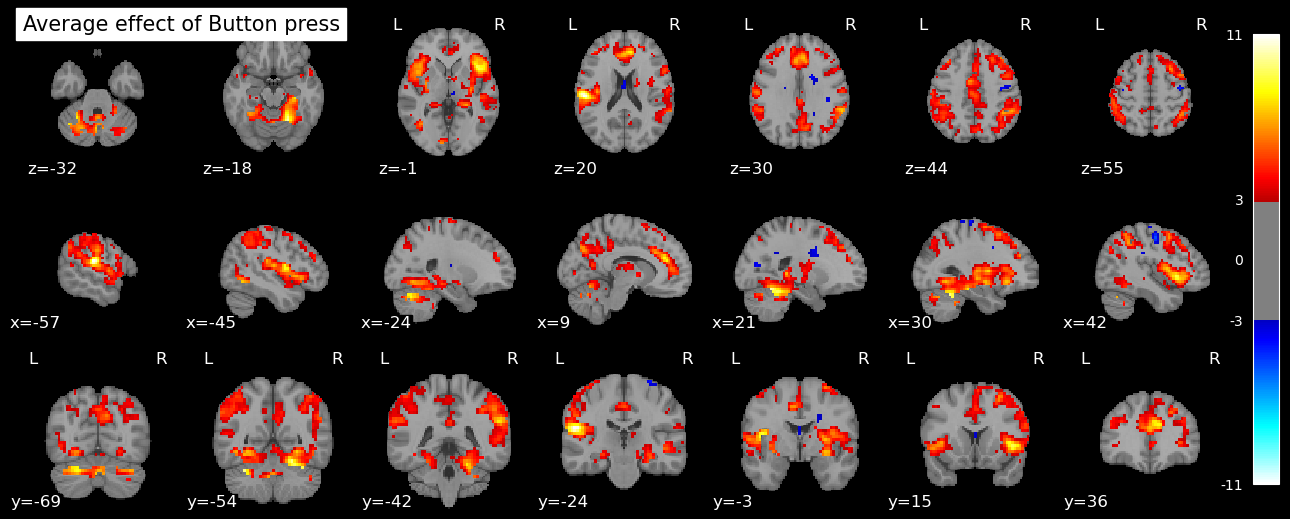

In [47]:
plot_stat_map(response_map, threshold=3, black_bg=True, display_mode='mosaic', title='Average effect of Button press')

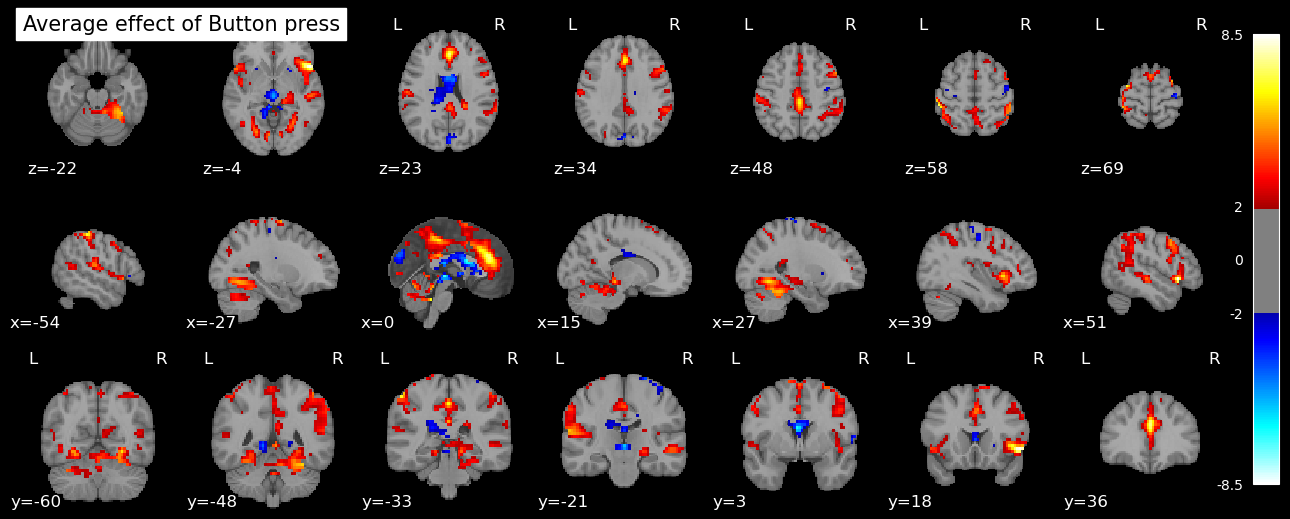

In [48]:
plot_stat_map(spm_stat, threshold=2, black_bg=True, display_mode='mosaic', title='Average effect of Button press')

In [ ]:
thresholded_zmap, threshold = threshold_stats_img(response_map, alpha=0.05, height_control='bonferroni', cluster_threshold=20)
print(f"RL whole brain Bonferroni threshold: {threshold:.3f}")

In [ ]:
plot_stat_map(thresholded_zmap, black_bg=True, display_mode='mosaic', title='Thresholded Button press whole brain z-map')